In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("test-zlib-1.csv")
df

,Distribution,Bits Truncated,Trial,Compression Duration (ns),Decompression Duration (ns),Original Size,Compressed Size,Compression Ratio,Original Mean,Original Mean Error,Original RMS,Original RMS Error,Decompressed Mean,Decompressed Mean Error,Decompressed RMS,Decompressed RMS Error,Mean CE,Mean Error CE,RMS CE,RMS Error CE
0,uniform_min=0_max=32,0,1,9487328050,1018814766,62500000,221931805,0.281618,16.000055,0.001168,9.237381,0.000826,16.000055,0.001168,9.237381,0.000826,0.00000,0.000000,0.000000,0.000000
1,uniform_min=0_max=32,0,2,10205750063,1059336105,62500000,221931805,0.281618,16.000055,0.001168,9.237381,0.000826,16.000055,0.001168,9.237381,0.000826,0.00000,0.000000,0.000000,0.000000
2,uniform_min=0_max=32,0,3,9894722003,1160248527,62500000,221931805,0.281618,16.000055,0.001168,9.237381,0.000826,16.000055,0.001168,9.237381,0.000826,0.00000,0.000000,0.000000,0.000000
3,uniform_min=0_max=32,0,4,10498156360,1327534035,62500000,221931805,0.281618,16.000055,0.001168,9.237381,0.000826,16.000055,0.001168,9.237381,0.000826,0.00000,0.000000,0.000000,0.000000
4,uniform_min=0_max=32,0,5,10285134459,1044155742,62500000,221931805,0.281618,16.000055,0.001168,9.237381,0.000826,16.000055,0.001168,9.237381,0.000826,0.00000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,uniform_min=0_max=32,23,6,12947673072,517889703,62500000,32775109,1.906935,16.000055,0.001168,9.237381,0.000826,10.666605,0.000833,5.701259,0.000589,5.33345,0.000336,3.536122,0.000237
236,uniform_min=0_max=32,23,7,12929050476,498584801,62500000,32775109,1.906935,16.000055,0.001168,9.237381,0.000826,10.666605,0.000833,5.701259,0.000589,5.33345,0.000336,3.536122,0.000237
237,uniform_min=0_max=32,23,8,12958108079,521150702,62500000,32775109,1.906935,16.000055,0.001168,9.237381,0.000826,10.666605,0.000833,5.701259,0.000589,5.33345,0.000336,3.536122,0.000237
238,uniform_min=0_max=32,23,9,12850322656,494545086,62500000,32775109,1.906935,16.000055,0.001168,9.237381,0.000826,10.666605,0.000833,5.701259,0.000589,5.33345,0.000336,3.536122,0.000237


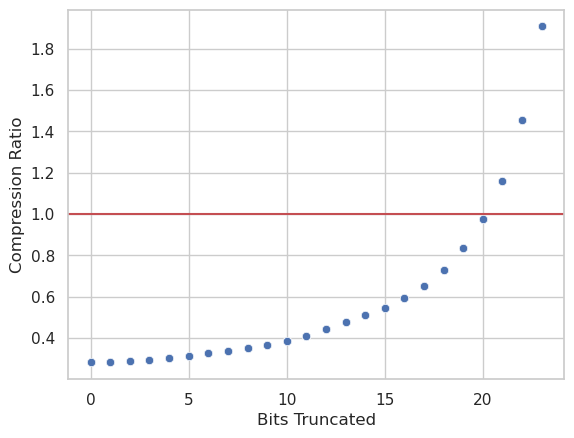

In [7]:
sns.set(style="whitegrid")
sns.scatterplot(data=df, x="Bits Truncated", y="Compression Ratio")

# Draw line at 1.0
plt.axhline(y=1.0, color='r', linestyle='-')

<Axes: xlabel='Bits Truncated', ylabel='Mean CE'>

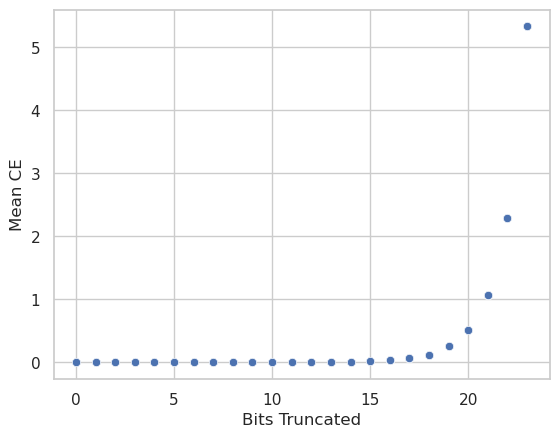

In [8]:
# Plot mean CE
sns.scatterplot(data=df, x="Bits Truncated", y="Mean CE")

<Axes: xlabel='Bits Truncated', ylabel='Mean CE'>

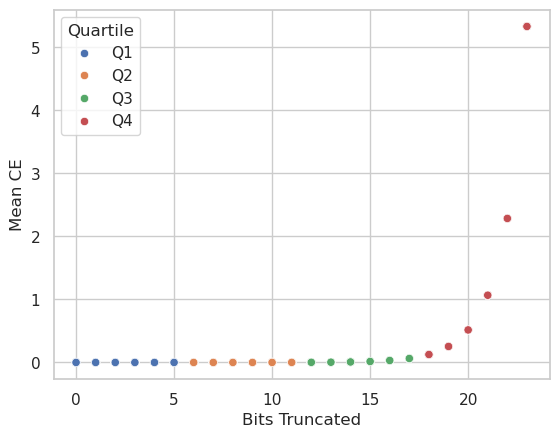

In [10]:
# Split mean CE into quartiles
df["Quartile"] = pd.qcut(df["Mean CE"], 4, labels=["Q1", "Q2", "Q3", "Q4"])
sns.scatterplot(data=df, x="Bits Truncated", y="Mean CE", hue="Quartile")

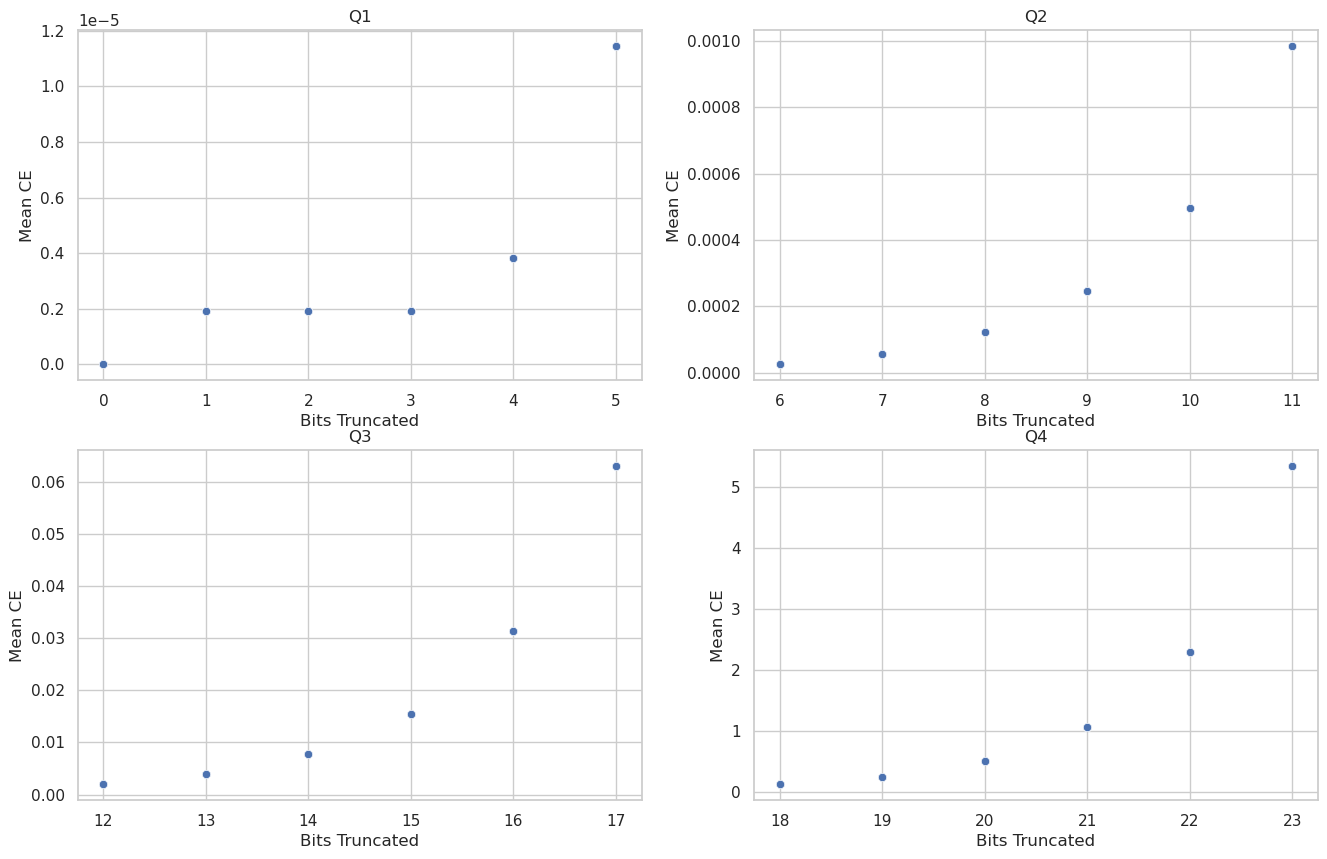

In [20]:
# Plot each quartile separately
plt.figure(figsize=(16, 10))
for i, quartile in enumerate(df["Quartile"].unique()):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(data=df[df["Quartile"] == quartile], x="Bits Truncated", y="Mean CE")
    plt.title(quartile)

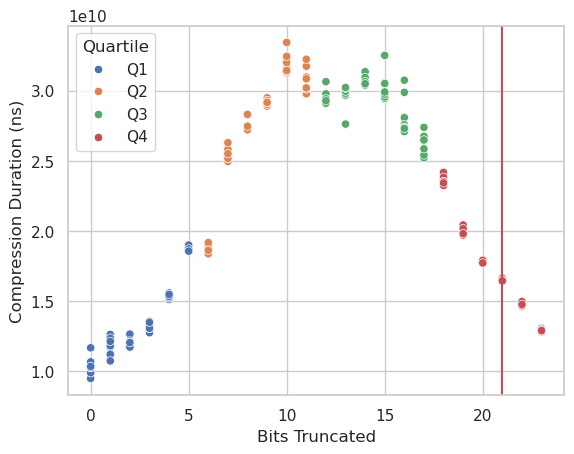

In [27]:
# Plot bits truncated vs compression time
sns.scatterplot(data=df, x="Bits Truncated", y="Compression Duration (ns)", hue="Quartile")

# Plot vertical line where compression ratio becomes greater than one
x_val = df[df["Compression Ratio"] > 1]["Bits Truncated"].min()
plt.axvline(x=x_val, color='r', linestyle='-')